<a href="https://colab.research.google.com/github/data-science-and-machine-learning/gradient-descent/blob/master/Implement_SGD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from tqdm import tqdm_notebook as tqdm

In [0]:
X = load_boston().data
Y = load_boston().target

In [0]:
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

In [92]:
clf = SGDRegressor()
clf.fit(X, Y)
print(mean_squared_error(Y, clf.predict(X)))
SGD_predicted= clf.predict(X)
SGD_actual= Y


21.99022196517428


In [7]:
import matplotlib.pyplot as plt
load_boston().feature_names
df= pd.DataFrame(data= X)
df['Target']= Y
df.head(15)

#plt.plot(df['Target'])

,0,1,2,3,4,5,6,7,8,9,10,11,12,Target
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,24.0
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,21.6
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,34.7
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,33.4
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,36.2
5,-0.417044,-0.487722,-1.306878,-0.272599,-0.835284,0.207096,-0.351157,1.077737,-0.752922,-1.106115,0.113032,0.410571,-1.043322,28.7
6,-0.410243,0.048772,-0.476654,-0.272599,-0.265154,-0.388411,-0.070229,0.839244,-0.523001,-0.577519,-1.505237,0.426798,-0.031268,22.9
7,-0.403696,0.048772,-0.476654,-0.272599,-0.265154,-0.160466,0.978808,1.024638,-0.523001,-0.577519,-1.505237,0.441052,0.910700,27.1
8,-0.395935,0.048772,-0.476654,-0.272599,-0.265154,-0.931206,1.117494,1.087196,-0.523001,-0.577519,-1.505237,0.328448,2.421774,16.5
9,-0.400729,0.048772,-0.476654,-0.272599,-0.265154,-0.399808,0.616090,1.329635,-0.523001,-0.577519,-1.505237,0.329325,0.623344,18.9


In [8]:
# number of dimentions: 
print('Model will be a {} dimentional plane'.format(len(df.columns)))

Model will be a 14 dimentional plane


slopes=  [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5] | 



Best Mean Square Error :  21.853703341917793
[-0.93502542  1.06420121  0.10700442  0.6934538  -2.05509778  2.65624803
  0.02080077 -3.10038397  2.55910174 -1.96524516 -2.05356489  0.85177103
 -3.76084467]
Hyperplane detected: 
y = (-0.94x0) + (1.06x1) + (0.11x2) + (0.69x3) + (-2.06x4) + (2.66x5) + (0.02x6) + (-3.10x7) + (2.56x8) + (-1.97x9) + (-2.05x10) + (0.85x11) + (-3.76x12) + 22.51


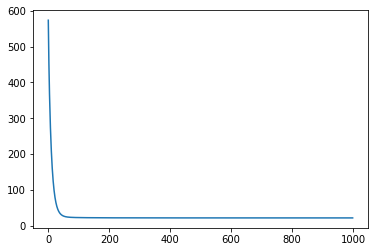

In [53]:
# Steps for gradient descent:
#1. iterate through all datapoints
#2. Apply equation of gradient descent
#3. return the equation of the hyperplane


# predicted = ax0 + bx1 + cx2 + dx3 + ex4 + fx5 + gx6 + hx7 + ix8 + jx9 + kx10 + lx11+ mx12+ n

# loss = Target - predicted



#a = a + loss * x0 * learning rate
#same goes for all slopes b, c, d... m

#for the intercept: 
#n = n + loss * learning rate

def gradientDescent(dataframe, iterations, learning_rate):
  mses= []
  
  slopes= np.repeat(0.5, (dataframe.shape[1]-1))
  print('slopes= ', slopes,  end=' | \n')
  intercept= 0
  for itern in tqdm(range(iterations)):
    y_pred= []
    k= 0
    for each in range(dataframe.shape[0]):
      point= np.array(dataframe.iloc[each]) 
      x= point[:-1]
      y= point[-1:]

      # predicted value=  ax0 + bx1 + cx2 + dx3 + ex4 + fx5 + gx6 + hx7 + ix8 + jx9 + kx10 + lx11+ mx12+ intercept
      predicted= np.sum(slopes * x)+intercept
      error= y[0]- predicted
      for i in range(len(slopes)):
        slopes[i] = slopes[i] + (error * x[i] * learning_rate)     

      intercept = intercept + (error * learning_rate)
      result= np.sum(slopes*x)+intercept
      y_pred.append(result)
      k= k+1
      
    mses.append([mean_squared_error(dataframe['Target'], y_pred), slopes, intercept])
    if itern > 3:
      if mses[-1] == mses[-2] == mses[-3]:
        # reducing 0.1% learning rate if mean square error matches.
        learning_rate= learning_rate-(0.001*learning_rate)
      elif mses[-1] == mses[-2]:
        # reducing 1% learning rate if mean square error matches.
        learning_rate= learning_rate-(0.01*learning_rate)
      elif mses[-1] > mses[-2]:
        # reducing 0.5% learning rate if mean square error raise.
        learning_rate= learning_rate-(0.005*learning_rate)
  return mses
    

results= gradientDescent(df, 1000, 0.0001)
mses= [results[i][0] for i in range(len(results))]
slopes= [results[i][1] for i in range(len(results))]
intercept= [results[i][2] for i in range(len(results))]

print('Best Mean Square Error : ', min(mses))
best_slope= slopes[np.argmin(mses)]
print(best_slope)
best_intercept= intercept[np.argmin(mses)]
# Hyperplane model:
print('Hyperplane detected: \ny = ', end='')
for it in range(len(slopes[0])):
  print('({:.2f}x{})'.format(best_slope[it], it), end=' + ')
print('{:.2f}'.format(intercept[np.argmin(mses)]))
plt.plot(mses)


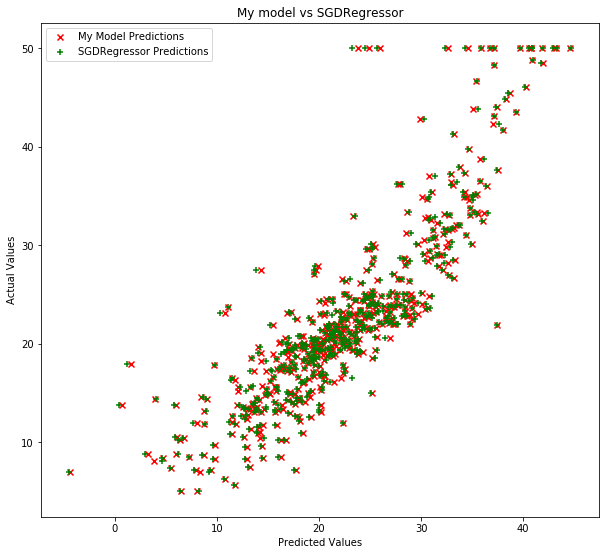

In [106]:
# predicted values vs actual values:
df.head(5)
actual_values= df['Target'].values
k=0
predicted_values= []
datapoints= df.drop(columns=['Target']).values
for datapoint in datapoints:
  prediction= np.sum(datapoint* best_slope) + best_intercept
  predicted_values.append(prediction)

fig= plt.figure(figsize=(10,20))
ax1 = fig.add_subplot(211)
ax1.scatter(predicted_values, actual_values, marker='x', c='r', label= 'My Model Predictions')
ax1.set(title='My model vs SGDRegressor', xlabel="Predicted Values", ylabel="Actual Values")
ax1.scatter(SGD_predicted, SGD_actual, marker='+', c='g', label= 'SGDRegressor Predictions')
ax1.legend()

In [116]:
from prettytable import PrettyTable

x= PrettyTable(["Weight", "My Model", "SGCRegressor"])
for i in range(len(clf.coef_)):
  x.add_row(['x{}'.format(i), round(best_slope[i], 2), round(clf.coef_[i], 2)])
  
print(x)


+--------+----------+--------------+
| Weight | My Model | SGCRegressor |
+--------+----------+--------------+
|   x0   |  -0.94   |    -0.88     |
|   x1   |   1.06   |     0.99     |
|   x2   |   0.11   |    -0.14     |
|   x3   |   0.69   |     0.69     |
|   x4   |  -2.06   |    -1.92     |
|   x5   |   2.66   |     2.72     |
|   x6   |   0.02   |    -0.05     |
|   x7   |   -3.1   |    -3.01     |
|   x8   |   2.56   |     1.94     |
|   x9   |  -1.97   |    -1.35     |
|  x10   |  -2.05   |    -2.03     |
|  x11   |   0.85   |     0.87     |
|  x12   |  -3.76   |    -3.72     |
+--------+----------+--------------+


In [119]:
print('Mean Square Error of SGCRegressor Model: ', round(mean_squared_error(Y, clf.predict(X)), 2))
print('Mean Square Error of My Model: ', round(min(mses), 2))

Mean Square Error of SGCRegressor Model:  21.99
Mean Square Error of My Model:  21.85
